In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import the requests library
import requests

#Import the API key
from config import weather_api_key

### Create Latitude and Longitude Combinations

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

635

## 6.2.6 Get the City Weather Data

In [6]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b6d66aa9d628b1271daa5baed23258f3


In [7]:
#Import the datetime module from the datetime library
from datetime import datetime

In [8]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop Through the List of Cities and Build the City URL

In [9]:
#Loop through all the cities in the list
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1

#Run an API request for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | lalomanu
City not found. Skipping...
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | madang
Processing Record 11 of Set 1 | balclutha
Processing Record 12 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | tatsinskaya
City not found. Skipping...
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | araouane
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | dali
Processing Record 22 

Processing Record 38 of Set 4 | havre-saint-pierre
Processing Record 39 of Set 4 | olafsvik
Processing Record 40 of Set 4 | vallenar
Processing Record 41 of Set 4 | camabatela
Processing Record 42 of Set 4 | vazante
Processing Record 43 of Set 4 | ishigaki
Processing Record 44 of Set 4 | tautira
Processing Record 45 of Set 4 | maltahohe
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | schwerin
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | barentu
Processing Record 50 of Set 4 | zhanakorgan
Processing Record 1 of Set 5 | innisfail
Processing Record 2 of Set 5 | rapid valley
Processing Record 3 of Set 5 | tapaua
City not found. Skipping...
Processing Record 4 of Set 5 | pervomayskoye
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | hwange
Processing Record 7 of Set 5 | quelimane
Processing Record 8 of Set 5 | constitucion
Processing Record 9 of Set 5 | mahadday weyne
City not found. Skipping...
Processing Record 10 of Se

Processing Record 31 of Set 8 | bitung
Processing Record 32 of Set 8 | crestview
Processing Record 33 of Set 8 | coihaique
Processing Record 34 of Set 8 | codrington
Processing Record 35 of Set 8 | klyuchi
Processing Record 36 of Set 8 | kieta
Processing Record 37 of Set 8 | shizunai
Processing Record 38 of Set 8 | coolum beach
Processing Record 39 of Set 8 | saleaula
City not found. Skipping...
Processing Record 40 of Set 8 | sao filipe
Processing Record 41 of Set 8 | bretzfeld
Processing Record 42 of Set 8 | makungu
Processing Record 43 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 8 | quang ngai
Processing Record 45 of Set 8 | praya
Processing Record 46 of Set 8 | berlin
Processing Record 47 of Set 8 | sokoni
Processing Record 48 of Set 8 | campo maior
Processing Record 49 of Set 8 | lakes entrance
Processing Record 50 of Set 8 | falam
Processing Record 1 of Set 9 | bargal
City not found. Skipping...
Processing Record 2 of Set 9 | grindavik
Processing R

Processing Record 19 of Set 12 | itarema
Processing Record 20 of Set 12 | hamilton
Processing Record 21 of Set 12 | biltine
Processing Record 22 of Set 12 | notodden
Processing Record 23 of Set 12 | djang
City not found. Skipping...
Processing Record 24 of Set 12 | socorro
Processing Record 25 of Set 12 | harper
Processing Record 26 of Set 12 | waipawa
Processing Record 27 of Set 12 | rundu
Processing Record 28 of Set 12 | porto novo
Processing Record 29 of Set 12 | calabozo
Processing Record 30 of Set 12 | talaya
Processing Record 31 of Set 12 | lagoa
Processing Record 32 of Set 12 | escuinapa
Processing Record 33 of Set 12 | paripiranga
Processing Record 34 of Set 12 | pyapon
Processing Record 35 of Set 12 | baruun-urt
Processing Record 36 of Set 12 | dubbo
Processing Record 37 of Set 12 | la rioja
Processing Record 38 of Set 12 | conceicao da barra
Processing Record 39 of Set 12 | eldikan
City not found. Skipping...
Processing Record 40 of Set 12 | marsabit
Processing Record 41 of S

## 6.2.7 Create a DataFrame of City Weather Data

In [10]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,28.99,62,100,4.00,US,2021-02-07 22:29:11
1,Mar Del Plata,-38.0023,-57.5575,61.00,88,90,13.80,AR,2021-02-07 22:29:11
2,Rikitea,-23.1203,-134.9692,77.65,72,97,13.13,PF,2021-02-07 22:29:11
3,Kodiak,57.7900,-152.4072,35.60,48,1,4.88,US,2021-02-07 22:29:12
4,Ushuaia,-54.8000,-68.3000,60.80,59,0,4.61,AR,2021-02-07 22:27:42
5,Provideniya,64.3833,-173.3000,-2.51,81,61,17.43,RU,2021-02-07 22:27:56
6,Arraial Do Cabo,-22.9661,-42.0278,73.40,88,75,6.91,BR,2021-02-07 22:29:13
7,Madang,-5.2246,145.7966,77.31,87,100,4.63,PG,2021-02-07 22:29:13
8,Balclutha,-46.2339,169.7500,64.99,76,100,8.01,NZ,2021-02-07 22:29:13
9,Hithadhoo,-0.6000,73.0833,81.73,70,56,6.64,MV,2021-02-07 22:29:14


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-02-07 22:29:11,42.6001,-73.9662,28.99,62,100,4.00
1,Mar Del Plata,AR,2021-02-07 22:29:11,-38.0023,-57.5575,61.00,88,90,13.80
2,Rikitea,PF,2021-02-07 22:29:11,-23.1203,-134.9692,77.65,72,97,13.13
3,Kodiak,US,2021-02-07 22:29:12,57.7900,-152.4072,35.60,48,1,4.88
4,Ushuaia,AR,2021-02-07 22:27:42,-54.8000,-68.3000,60.80,59,0,4.61
5,Provideniya,RU,2021-02-07 22:27:56,64.3833,-173.3000,-2.51,81,61,17.43
6,Arraial Do Cabo,BR,2021-02-07 22:29:13,-22.9661,-42.0278,73.40,88,75,6.91
7,Madang,PG,2021-02-07 22:29:13,-5.2246,145.7966,77.31,87,100,4.63
8,Balclutha,NZ,2021-02-07 22:29:13,-46.2339,169.7500,64.99,76,100,8.01
9,Hithadhoo,MV,2021-02-07 22:29:14,-0.6000,73.0833,81.73,70,56,6.64


In [12]:
#Create the output file (CSV)
output_data_file = "Weather_Data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## 6.3.1 Plot Latitude vs. Temperature
### Get Data for Plotting

In [13]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

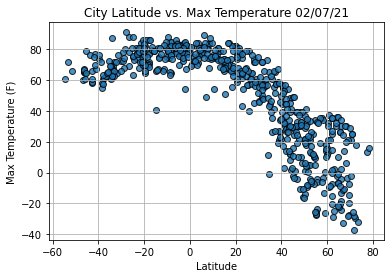

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig1.png")

#Show plot
plt.show()

## 6.3.2 Plot Latitude vs. Humidity

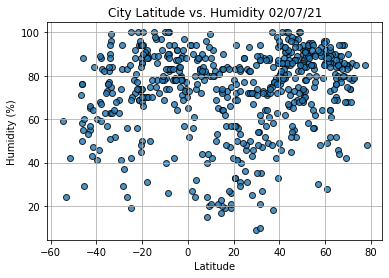

In [15]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig2.png")

#Show plot
plt.show()

## 6.3.3 Plot Latitude vs. Cloudiness

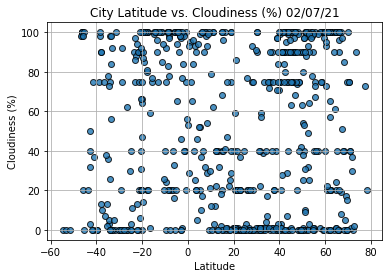

In [16]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig3.png")

#Show plot
plt.show()

## 6.3.4 Plot Latitude vs. Wind Speed

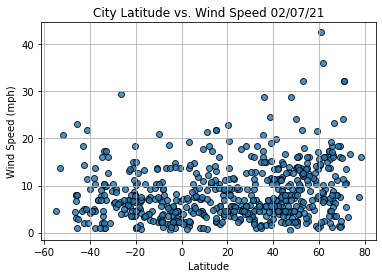

In [17]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Weather_Data/Fig4.png")

# Show plot
plt.show()

## 6.4.2 Find the Correlation Between Latitude and Maximum Temperature
### Create a Linear Regression Function

In [18]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Create the Hemisphere DataFrames

In [19]:
index13 = city_data_df.loc[13]
index13

City                     Araouane
Country                        ML
Date          2021-02-07 22:29:16
Lat                       18.9048
Lng                       -3.5265
Max Temp                    64.94
Humidity                       26
Cloudiness                     75
Wind Speed                  11.12
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
583     True
584     True
585     True
586     True
587     True
Name: Lat, Length: 588, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-02-07 22:29:11,42.6001,-73.9662,28.99,62,100,4.00
3,Kodiak,US,2021-02-07 22:29:12,57.7900,-152.4072,35.60,48,1,4.88
5,Provideniya,RU,2021-02-07 22:27:56,64.3833,-173.3000,-2.51,81,61,17.43
10,Khatanga,RU,2021-02-07 22:29:15,71.9667,102.5000,-29.72,79,0,10.65
13,Araouane,ML,2021-02-07 22:29:16,18.9048,-3.5265,64.94,26,75,11.12


In [22]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

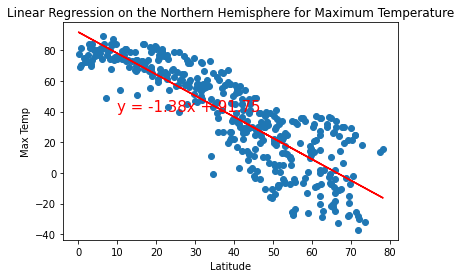

In [23]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

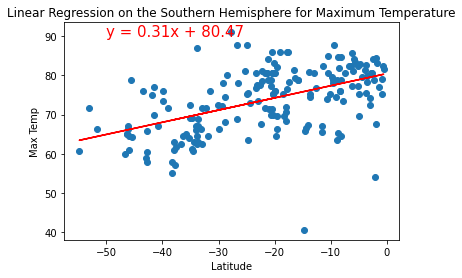

In [24]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

## 6.4.3 Find the Correlation Between Latitude and Percent Humidity
### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

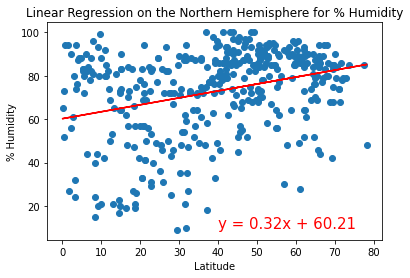

In [25]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

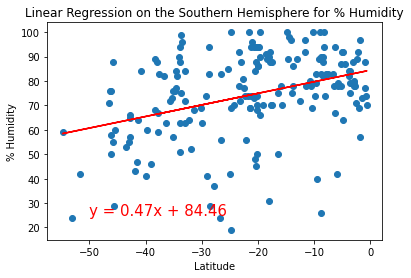

In [26]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,25))

## 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
#### Skill Drill

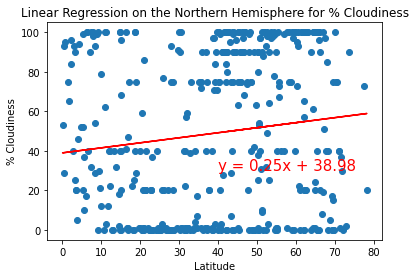

In [27]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,30))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

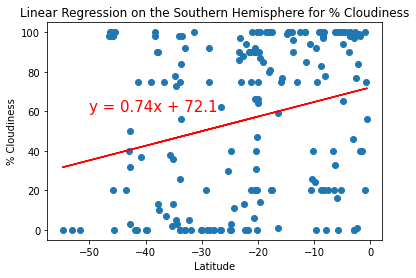

In [28]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

## 6.4.5 Find the Correlation Between Latitude and Wind Speed
### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

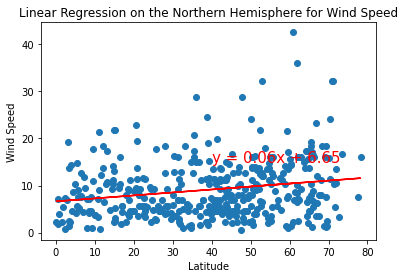

In [29]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,15))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

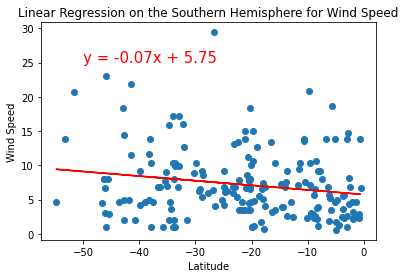

In [30]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))